# Part I: Preprocessing and EDA
The data comes from a global e-retailer company, including orders from 2012 to 2015. Import the Orders dataset and do some basic EDA.

For problem 1 to 3, we mainly focus on data cleaning and data visualizations. You can use all the packages that you are familiar with to conduct some plots and also provide brief interpretations about your findings.

In [1]:
import pandas as pd
import numpy as np
import re

In [11]:
df_orders = pd.read_csv('./data/Orders.csv')
df_orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [3]:
df_orders.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales              object
Quantity            int64
Discount          float64
Profit             object
Shipping.Cost     float64
Order.Priority     object
dtype: object

In [4]:
df_orders.shape

(51290, 24)

## Problem 1: Dataset Import & Cleaning
Check “Profit” and “Sales” in the dataset, convert these two columns to numeric type.

In [5]:
np.sum(df_orders.isnull())

Row.ID                0
Order.ID              0
Order.Date            0
Ship.Date             0
Ship.Mode             0
Customer.ID           0
Customer.Name         0
Segment               0
Postal.Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product.ID            0
Category              0
Sub.Category          0
Product.Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping.Cost         0
Order.Priority        0
dtype: int64

In [15]:
df_orders[['Profit', 'Sales']].head()

,Profit,Sales
0,$62.15,$221.98
1,-$288.77,"$3,709.40"
2,$919.97,"$5,175.17"
3,-$96.54,"$2,892.51"
4,$311.52,"$2,832.96"


In [38]:
df_orders['Profit'] = df_orders['Profit'].apply(lambda x: x.replace(',', ''))
df_orders['Profit'] = df_orders['Profit'].apply(lambda x: x.replace('$', ''))
df_orders['Profit'] = df_orders['Profit'].astype(float)
df_orders['Sales'] = df_orders['Sales'].apply(lambda x: x.replace(',', ''))
df_orders['Sales'] = df_orders['Sales'].apply(lambda x: x.replace('$', ''))
df_orders['Sales'] = df_orders['Sales'].astype(float)

In [40]:
df_orders[['Profit', 'Sales']].head()

,Profit,Sales
0,62.15,221.98
1,-288.77,3709.40
2,919.97,5175.17
3,-96.54,2892.51
4,311.52,2832.96


In [41]:
df_orders[['Profit', 'Sales']].dtypes

Profit    float64
Sales     float64
dtype: object

## Problem 2: Inventory Management
Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year’s inventory.
<br> He wants you to answer the following questions:
- Is there any seasonal trend of inventory in the company?
- Is the seasonal trend the same for different categories?

Hint: For each order, it has an attribute called Quantity that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.

In [42]:
df_orders[df_orders.duplicated(keep=False)]

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority


In [44]:
df_orders['Order.Date'] = pd.to_datetime(df_orders['Order.Date'])
df_orders['Order.Date'].dtype

dtype('<M8[ns]')

In [45]:
df_orders['Ship.Date'] = pd.to_datetime(df_orders['Ship.Date'])
df_orders['Ship.Date'].dtype

dtype('<M8[ns]')

In [46]:
df_orders.dtypes

Row.ID                     int64
Order.ID                  object
Order.Date        datetime64[ns]
Ship.Date         datetime64[ns]
Ship.Mode                 object
Customer.ID               object
Customer.Name             object
Segment                   object
Postal.Code              float64
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product.ID                object
Category                  object
Sub.Category              object
Product.Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping.Cost            float64
Order.Priority            object
dtype: object

In [47]:
df_orders['Category'].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

In [53]:
df_orders['Order.Month'] = df_orders['Order.Date'].dt.month
df_orders[['Order.Date', 'Order.Month']].head()

,Order.Date,Order.Month
0,2014-11-11,11
1,2014-02-05,2
2,2014-10-17,10
3,2014-01-28,1
4,2014-11-05,11


In [54]:
df_orders['Order.Month'].dtype

dtype('int64')

In [65]:
df_orders_tech = df_orders[df_orders['Category'] == 'Technology']
df_orders_tech.shape

(10141, 25)

In [56]:
df_orders_furn = df_orders[df_orders['Category'] == 'Furniture']
df_orders_furn.shape

(9860, 25)

In [57]:
df_orders_offi = df_orders[df_orders['Category'] == 'Office Supplies']
df_orders_offi.shape

(31289, 25)

In [60]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [70]:
df_orders_tech.groupby('Order.Month').agg({'Quantity':['sum']})

,Quantity
,sum
Order.Month,
1,1642
2,1595
3,2009
4,2070
5,2542
6,3563
7,2271
8,3518


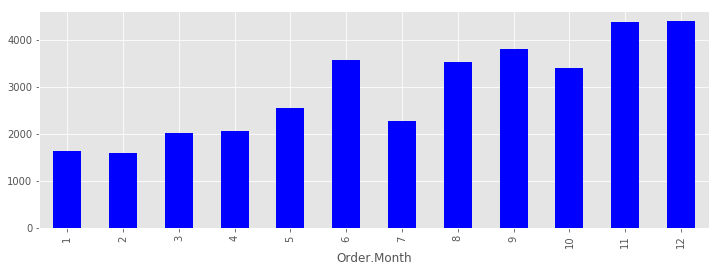

In [69]:
plt.figure(figsize = (12,4))
df_orders_tech.groupby('Order.Month')['Quantity'].sum().plot.bar(color = 'b')

In [71]:
df_orders_furn.groupby('Order.Month').agg({'Quantity':['sum']})

,Quantity
,sum
Order.Month,
1,1750
2,1494
3,2098
4,2005
5,2484
6,3434
7,2157
8,3059


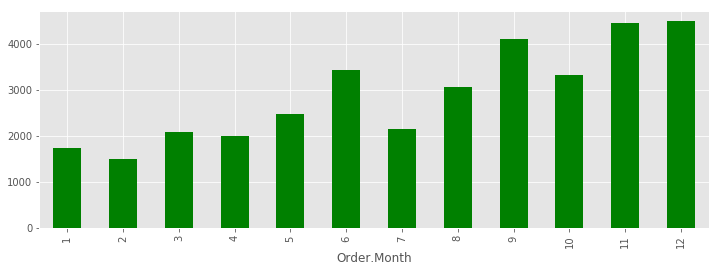

In [74]:
plt.figure(figsize = (12,4))
df_orders_furn.groupby('Order.Month')['Quantity'].sum().plot.bar(color = 'g')

In [72]:
df_orders_offi.groupby('Order.Month').agg({'Quantity':['sum']})

,Quantity
,sum
Order.Month,
1,5480
2,4340
3,6283
4,6391
5,8170
6,11012
7,6618
8,11019


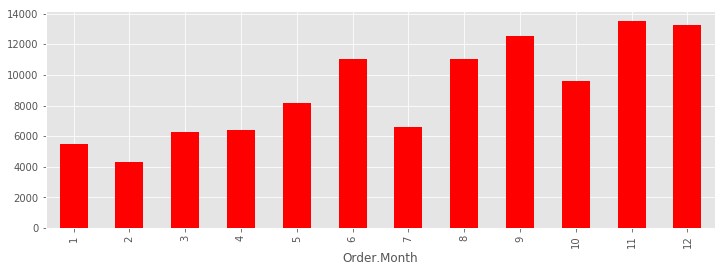

In [73]:
plt.figure(figsize = (12,4))
df_orders_offi.groupby('Order.Month')['Quantity'].sum().plot.bar(color = 'r')

## Problem 3: Why did customers make returns?
Your manager required you to give a brief report (Plots + Interpretations) on returned orders.

Hint: Merge the Returns dataframe with the Orders dataframe using Order.ID.

In [75]:
df_returns = pd.read_csv('./data/Returns.csv')
df_returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [76]:
df_returns.dtypes

Returned    object
Order ID    object
Region      object
dtype: object

In [77]:
df_returns.shape

(1079, 3)

In [78]:
np.sum(df_returns.isnull())

Returned    0
Order ID    0
Region      0
dtype: int64

In [89]:
df_returns['Returned'].unique()

array(['Yes'], dtype=object)

In [98]:
df_all = pd.merge(df_orders, df_returns, how = 'left', left_on = 'Order.ID', right_on = 'Order ID')
df_all.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Order ID,Region_y
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,221.98,2,0.0,62.15,40.77,High,11,NaN,NaN,NaN
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,3709.40,9,0.1,-288.77,923.63,Critical,2,NaN,NaN,NaN
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,5175.17,9,0.1,919.97,915.49,Medium,10,NaN,NaN,NaN
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,2892.51,5,0.1,-96.54,910.16,Medium,1,NaN,NaN,NaN
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,2832.96,8,0.0,311.52,903.04,Critical,11,NaN,NaN,NaN


In [99]:
df_all['Returned'].unique()

array([nan, 'Yes'], dtype=object)

In [100]:
df_all = df_all.drop(['Order ID', 'Region_y'], 1) 

In [101]:
np.sum(df_all.isnull())

Row.ID                0
Order.ID              0
Order.Date            0
Ship.Date             0
Ship.Mode             0
Customer.ID           0
Customer.Name         0
Segment               0
Postal.Code       41296
City                  0
State                 0
Country               0
Region_x              0
Market                0
Product.ID            0
Category              0
Sub.Category          0
Product.Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping.Cost         0
Order.Priority        0
Order.Month           0
Returned          49070
dtype: int64

In [102]:
df_all['Returned'] = df_all['Returned'].fillna('No')

In [103]:
np.sum(df_all.isnull())

Row.ID                0
Order.ID              0
Order.Date            0
Ship.Date             0
Ship.Mode             0
Customer.ID           0
Customer.Name         0
Segment               0
Postal.Code       41296
City                  0
State                 0
Country               0
Region_x              0
Market                0
Product.ID            0
Category              0
Sub.Category          0
Product.Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping.Cost         0
Order.Priority        0
Order.Month           0
Returned              0
dtype: int64

In [104]:
df_all.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,11,No
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2,No
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,10,No
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,1,No
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,11,No


- How much profit did we lose due to returns each year?

In [109]:
df_all['Order.Date'].dt.year.unique()

array([2014, 2012, 2013, 2015], dtype=int64)

In [137]:
df_yearly_lose = pd.DataFrame({'Year': [2012, 2013, 2014, 2015],
                               'Return.Lose': [0.0, 0.0, 0.0, 0.0]})

In [140]:
df_yearly_lose.iloc[0, 1] = sum(df_all[(df_all['Returned'] == 'Yes') & (df_all['Order.Date'].dt.year == 2012)]['Profit'])
df_yearly_lose.iloc[1, 1] = sum(df_all[(df_all['Returned'] == 'Yes') & (df_all['Order.Date'].dt.year == 2013)]['Profit'])
df_yearly_lose.iloc[2, 1] = sum(df_all[(df_all['Returned'] == 'Yes') & (df_all['Order.Date'].dt.year == 2014)]['Profit'])
df_yearly_lose.iloc[3, 1] = sum(df_all[(df_all['Returned'] == 'Yes') & (df_all['Order.Date'].dt.year == 2015)]['Profit'])
df_yearly_lose

,Year,Return.Lose
0,2012,17477.26
1,2013,9269.89
2,2014,17510.63
3,2015,17112.97


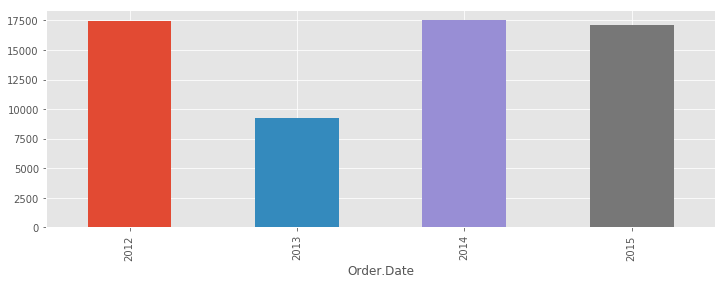

In [149]:
plt.figure(figsize = (12,4))
df_all[(df_all['Returned'] == 'Yes')].groupby(df_all['Order.Date'].dt.year)['Profit'].sum().plot.bar()

- How many customer returned more than once? more than 5 times?

In [157]:
df_customer_return = df_all[df_all['Returned'] == 'Yes'].groupby('Customer.ID').agg({'Returned':['count']})
df_customer_return.columns = df_customer_return.columns.droplevel(1)
df_customer_return.head()

,Returned
Customer.ID,
AA-1031558,1
AA-106451404,1
AA-1064559,3
AA-1064564,1
AA-645137,1


In [126]:
len(df_customer_return[df_customer_return['Returned'] > 1])

547

In [127]:
len(df_customer_return[df_customer_return['Returned'] > 5])

46

C:\Users\Xu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'Returned' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


<Figure size 864x288 with 0 Axes>

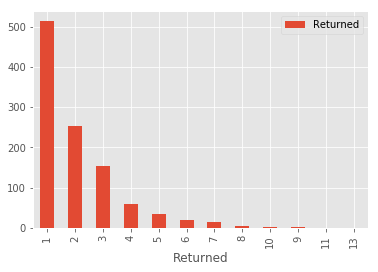

In [155]:
plt.figure(figsize = (12,4))
df_customer_return.groupby(df_customer_return['Returned'].astype(str)).count().sort_values('Returned', ascending = False).plot.bar()

- Which regions are more likely to return orders?

In [133]:
df_all['Sub.Category'].unique()

array(['Phones', 'Chairs', 'Copiers', 'Tables', 'Bookcases', 'Art',
       'Appliances', 'Storage', 'Fasteners', 'Machines', 'Accessories',
       'Furnishings', 'Binders', 'Labels', 'Paper', 'Supplies',
       'Envelopes'], dtype=object)

<Figure size 864x288 with 0 Axes>

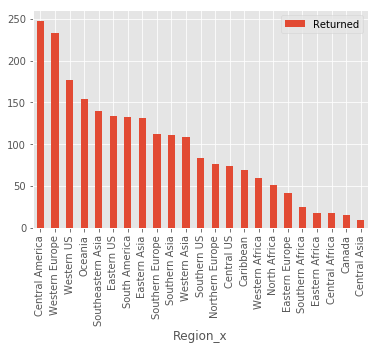

In [158]:
df_region_return = df_all[df_all['Returned'] == 'Yes'].groupby('Region_x').agg({'Returned':['count']})
df_region_return.columns = df_region_return.columns.droplevel(1)
plt.figure(figsize = (12,4))
df_region_return.sort_values('Returned', ascending = False).plot.bar()

- Which categories (sub-categories) of products are more likely to be returned?

<Figure size 864x288 with 0 Axes>

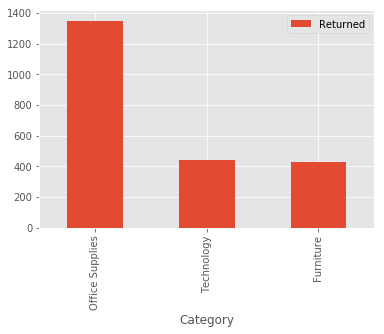

In [160]:
df_category_return = df_all[df_all['Returned'] == 'Yes'].groupby('Category').agg({'Returned':['count']})
df_category_return.columns = df_category_return.columns.droplevel(1)
plt.figure(figsize = (12,4))
df_category_return.sort_values('Returned', ascending = False).plot.bar()

<Figure size 864x288 with 0 Axes>

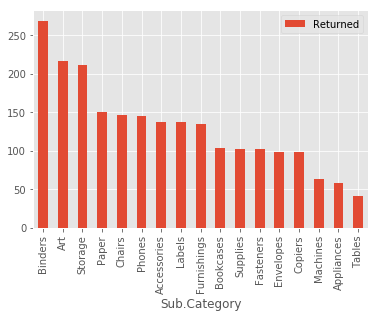

In [161]:
df_subcate_return = df_all[df_all['Returned'] == 'Yes'].groupby('Sub.Category').agg({'Returned':['count']})
df_subcate_return.columns = df_subcate_return.columns.droplevel(1)
plt.figure(figsize = (12,4))
df_subcate_return.sort_values('Returned', ascending = False).plot.bar()